In [1]:
from probly.quantification.classification import total_entropy
from probly.tasks import selective_prediction

import numpy as np
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the covertype dataset

In [2]:
data = fetch_covtype()
X, y = data.data, data.target
y = y - 1 # make the labels 0-indexed

# Fit a random forest

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# We set the max_depth to prevent obtaining only degenerate distributions.
rf = RandomForestClassifier(n_estimators=20, max_depth=10)
rf.fit(X_train, y_train)
probs = [tree.predict_proba(X_test) for tree in rf.estimators_]
# We need to change the order of the axes to match probly's convention of [n_instances, n_samples, n_classes]
probs = np.array(probs).swapaxes(0, 1)

# Make an accuracy-rejection curve using total uncertainty

In [4]:
tu = total_entropy(probs)
accuracies = (probs.mean(axis=1).argmax(axis=1) == y_test).astype(int)
auc, bins = selective_prediction(tu, accuracies)

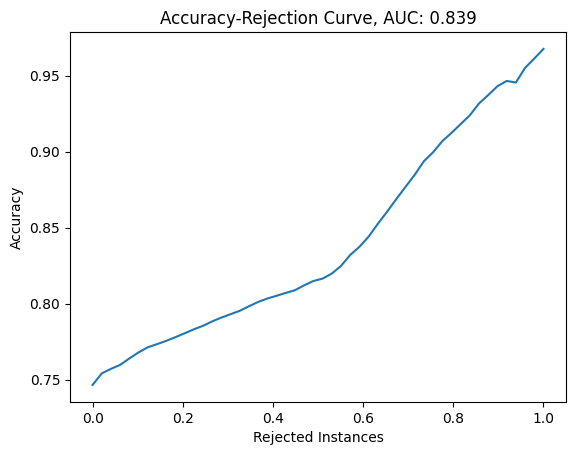

In [5]:
plt.plot(np.linspace(0,1,len(bins)), bins)
plt.xlabel('Rejected Instances')
plt.ylabel('Accuracy')
plt.title(f'Accuracy-Rejection Curve, AUC: {auc:.3f}')
plt.show()